In [1]:
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import scipy as sp

resolution = 100

Text(0.5, 1.0, "Testing scipy's Modified Bessel Function of the Second Kind")

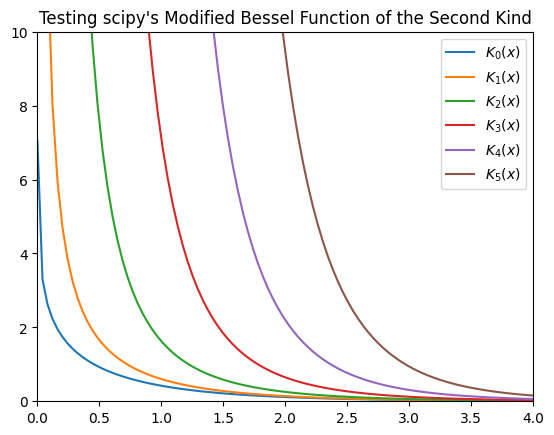

In [2]:
x = np.linspace(0.001, 4, resolution)

y0 = sp.special.kn(0, x)
y1 = sp.special.kn(1, x)
y2 = sp.special.kn(2, x)
y3 = sp.special.kn(3, x)
y4 = sp.special.kn(4, x)
y5 = sp.special.kn(5, x)
plt.plot(x, y0, label=r'$K_0(x)$')
plt.plot(x, y1, label=r'$K_1(x)$')
plt.plot(x, y2, label=r'$K_2(x)$')
plt.plot(x, y3, label=r'$K_3(x)$')
plt.plot(x, y4, label=r'$K_4(x)$')
plt.plot(x, y5, label=r'$K_5(x)$')
plt.legend()
plt.ylim(0, 10)
plt.xlim(0,  4)
plt.title("Testing scipy's Modified Bessel Function of the Second Kind")

## Energy Density

$$
\epsilon(T, m) = 3 T^2 K_2\left(\frac{m}{T}\right) + T K_1\left(\frac{m}{T}\right)
$$

In [ ]:
temp_range = (0.01, 10)
mass_range = (0.1, 1)

def energy_density(T, m=1):
    return 3 * T**2 * sp.special.kn(2, m/T) + T * sp.special.kn(1, m/T)

T = np.linspace(temp_range[0], temp_range[1], resolution)
m = np.linspace(mass_range[0], mass_range[1], resolution)

T_grid, m_grid = np.meshgrid(T, m)
eps = energy_density(T_grid, m_grid)

fig = go.Figure(data=[go.Surface(x=T, y=m, z=eps)])

# label x, y and z axes
fig.update_layout(
    scene = dict(
        xaxis_title='Temperature',
        yaxis_title='Mass',
        zaxis_title='Energy Density'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.update_layout(autosize=False, width=800, height=600)


## Pressure

$$
P(T, m) = T^2 K_2\left(\frac{m}{T}\right)
$$

In [ ]:

temp_range = (0.01, 10)
mass_range = (0.1, 1)
def pressure(T, m=1):
    return T**2 * sp.special.kn(2, m/T)

T = np.linspace(temp_range[0], temp_range[1], resolution)
m = np.linspace(mass_range[0], mass_range[1], resolution)

T_grid, m_grid = np.meshgrid(T, m)
p = pressure(T_grid, m_grid)

fig = go.Figure(data=[go.Surface(x=T, y=m, z=p)])

fig.update_layout(
    scene = dict(
        xaxis_title='Temperature',
        yaxis_title='Mass',
        zaxis_title='Pressure'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.update_layout(autosize=False, width=800, height=600)

## Entropy Density

$$
s(T, m) = K_3\left(\frac{m}{T}\right)
$$

In [ ]:
# P(T) = T^2 K_2(m/T)

temp_range = (0.01, 10)
mass_range = (0.1, 1)

T = np.linspace(temp_range[0], temp_range[1], resolution)
m = np.linspace(mass_range[0], mass_range[1], resolution)

def entropy_density(T, m=1):
    return sp.special.kn(3, m/T)

T_grid, m_grid = np.meshgrid(T, m)
s = entropy_density(T_grid, m_grid)

fig = go.Figure(data=[go.Surface(x=T, y=m, z=s)])

# label x, y and z axes
fig.update_layout(
    scene = dict(
        xaxis_title='Temperature',
        yaxis_title='Mass',
        zaxis_title='Energy Density'
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)

fig.update_layout(autosize=False, width=800, height=600)